In [96]:
# first must import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [97]:
data = pd.read_csv('HR_comma_sep.csv')

In [98]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [99]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [101]:
# let's find average of employees who left the company

left = data.groupby('left')

left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [102]:
# Most employees who left the company had low satisfaction lvls, low promotion rates, lower salary, and worked more compared with those who stayed in the company

In [103]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


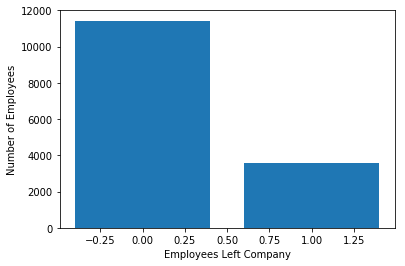

In [104]:
# Graph showing employees who left

left_count = data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [105]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [106]:
# So out of the approx. 15,000 employees, about 3,500 left

In [107]:
# On a different note, let's look at how many projects each employee is working on at a given time:

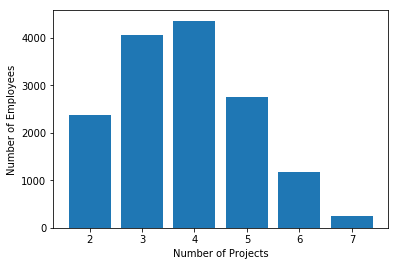

In [108]:
num_projects = data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

In [109]:
# Zero employees are working on only one project, and normally, employees are working on 3-5 projects at a time.

In [110]:
# Now let's look at the number of years spent in the company per employee:

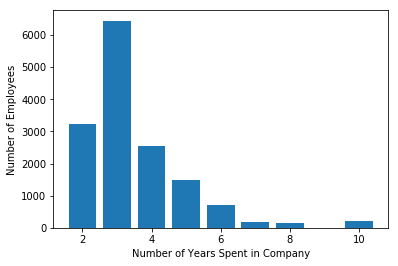

In [111]:
time_spent = data.groupby('time_spend_company').count()

plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spent in Company')
plt.ylabel('Number of Employees')
plt.show()

In [112]:
# From above bar graph, we can see most employees leave after 2-4 years

In [113]:
# Let's strip the whitespace from the column headers

data.columns = data.columns.str.strip()
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [114]:
# Now let's try Seaborn w/ subplots

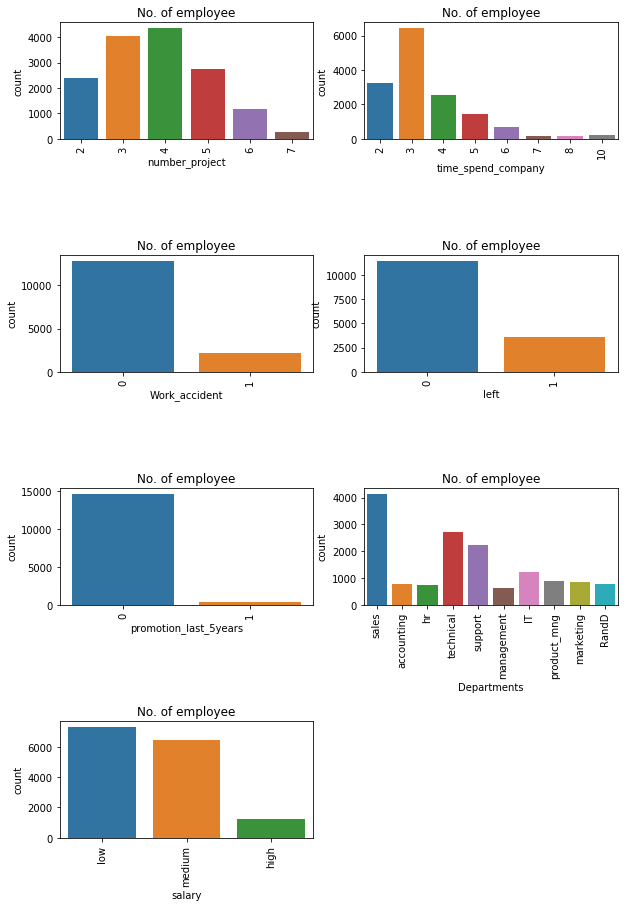

In [115]:
features = ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments', 'salary']
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

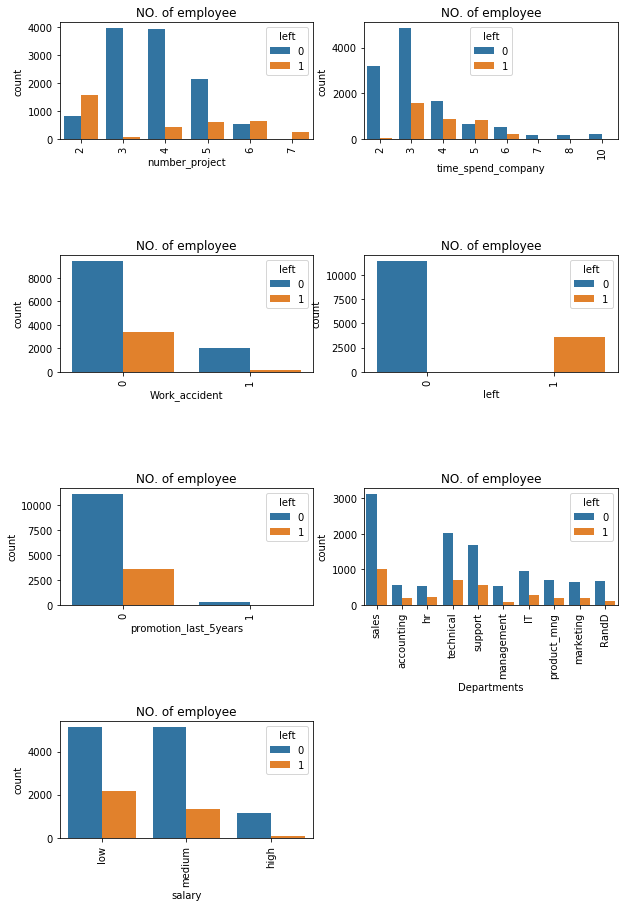

In [116]:
# Find out more with Seaborn
# Plotting if an employee left against several variables

fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1)
    sns.countplot(x=j, data=data, hue='left')
    plt.xticks(rotation=90)
    plt.title("NO. of employee")

In [117]:
# Points to be brought up:
# - Employees with greater than 5 projects leave
# - After 5 years w/out a raise, employees left. Those who got a raise, stayed.

In [118]:
# TAKEAWAYS

#- Employees are more likely to quit w/out a promotion in past 5 years
#- Three year mark looks critical, also after 6 years, looks like you have them for the long run.
#- 3-5 projects seems to be the magic number(s)
#- Obviously lower salary leads to quitting

In [119]:
# CLUSTER ANALYSIS

In [120]:
from sklearn.cluster import KMeans

# Filter the data I'm utilizing
left_emp = data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups w/ K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(left_emp)

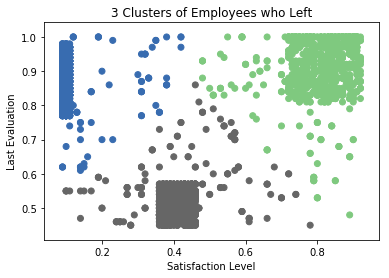

In [121]:
# Add 'label' column & assign labels to cluster
left_emp['label'] = kmeans.labels_

# Scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'], cmap='Accent')
plt.title('3 Clusters of Employees who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [122]:
# So we can now see satisfaction lvls vs. evaluation scores

In [123]:
# ML time: Building a prediction model

In [124]:
# sklearn will encode our categorical data into numerical data for us:

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['salary'] = le.fit_transform(data['salary'])
data['Departments'] = le.fit_transform(data['Departments'])

In [125]:
# Split data into training and test sets

In [126]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
         'average_montly_hours', 'time_spend_company', 'Work_accident',
         'promotion_last_5years', 'Departments', 'salary']]

y = data['left']

In [127]:
from sklearn.model_selection import train_test_split

# Split into train/test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Used 0.3 to make 30% our test set, thus 70% is the train set.

In [129]:
# Gradient boosting classifier model

from sklearn.ensemble import GradientBoostingClassifier

# Classifier
gb = GradientBoostingClassifier()

# Use training sets to train model
gb.fit(X_train, y_train)

# Predictor

y_pred = gb.predict(X_test)

In [130]:
gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [133]:
# EVALUATING MODEL PERFORMANCE
# import scikit-learn module to get metrics

from sklearn import metrics

# How often is the mofel correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model precision
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model recall
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


In [134]:
# 97% accuracy is great. 
# 95% precision means: when the Gradient Boosting model made a prediction, ie. that an employee will leave, it was correct 95% of the time.